In [1]:
# Importing Modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
trainfilename_5 =  r'/content/training_data_5.mat'
trainfilename_6 = r'/content/training_data_6.mat'
testfilename_5 = r'/content/testing_data_5.mat'
testfilename_6 = r'/content/testing_data_6.mat'

In [3]:
# Loading the Data
raw_data_train_5 = loadmat(trainfilename_5)['train_data_5']
raw_data_train_6 = loadmat(trainfilename_6)['train_data_6']
raw_data_test_5 = loadmat(testfilename_5)['test_data_5']
raw_data_test_6 = loadmat(testfilename_6)['test_data_6']

In [4]:
raw_data_train_6.shape,raw_data_train_5.shape

((5918, 28, 28), (5421, 28, 28))

In [5]:
raw_data_train_5 = raw_data_train_5.reshape(raw_data_train_5.shape[0],-1)
raw_data_train_6 = raw_data_train_6.reshape(raw_data_train_6.shape[0],-1)
raw_data_test_5 = raw_data_test_5.reshape(raw_data_test_5.shape[0],-1)
raw_data_test_6 = raw_data_test_6.reshape(raw_data_test_6.shape[0],-1)

In [6]:
raw_data_train_5.shape,raw_data_train_6.shape

((5421, 784), (5918, 784))

# Task 1:Feature normalization (Data conditioning)

In [7]:
# Function to normalise
def feature_normalization(array):
  mean = array.mean(axis = 0)
  std = array.std(axis = 0)
  std = np.where(std == 0,1.0,std)
  return mean,std


In [8]:
train_data = np.concatenate((raw_data_train_5, raw_data_train_6), axis=0)

In [9]:
mean,std = feature_normalization(train_data)

In [10]:
normalised_train_5 = (raw_data_train_5 - mean)/std
normalised_train_6 = (raw_data_train_6 - mean)/std
normalised_test_5 = (raw_data_test_5 - mean)/std
normalised_test_6 = (raw_data_test_6 - mean)/std

In [11]:
normalised_train_5.shape

(5421, 784)

In [12]:
train_data = np.concatenate((normalised_train_5, normalised_train_6), axis=0)
test_data = np.concatenate((normalised_test_5,normalised_test_6), axis=0)

In [13]:
train_data.max()

106.48462

# Task 2: PCA using the training samples


In [14]:
# Function to cacualte eigen vectors
def eigen_vectors_calculation(array):
  covarience_matrix = np.cov(array,rowvar=False)
  eigen_values,eigen_vectors = np.linalg.eig(covarience_matrix)
  selected_eigen_vectors = eigen_vectors[:,:2]
  return selected_eigen_vectors


In [15]:
normalized_train_data = np.concatenate((normalised_train_5,normalised_train_6),axis=0)
selected_eigen_vectors = eigen_vectors_calculation(normalized_train_data)

In [16]:
def reduce_dimensions(array,eigen_vectors):
  return np.dot(array, eigen_vectors).real

In [17]:
train_5_reduced_dimension = reduce_dimensions(normalised_train_5,selected_eigen_vectors)
train_6_reduced_dimension = reduce_dimensions(normalised_train_6,selected_eigen_vectors)
test_5_reduced_dimension = reduce_dimensions(normalised_test_5,selected_eigen_vectors)
test_6_reduced_dimension = reduce_dimensions(normalised_test_6,selected_eigen_vectors)


In [18]:
train_5_reduced_dimension

array([[ -7.28930416,   4.12641308],
       [ -4.52845743,  -2.21921686],
       [ -7.91575916,  -0.50940245],
       ...,
       [ -5.05634815,  -1.44032524],
       [ -5.5665111 ,  -1.40109449],
       [-10.23796514,   5.6836416 ]])

# Task 3. Dimension reduction using PCA

Text(0.5, 1.0, 'Train_5')

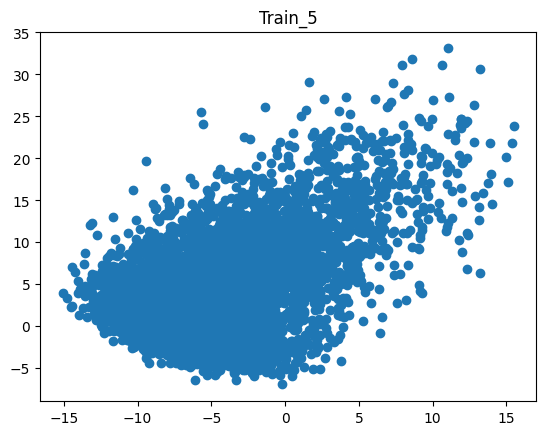

In [19]:
plt.scatter(train_5_reduced_dimension[:,0] ,train_5_reduced_dimension[:,1])
plt.title('Train_5')

Text(0.5, 1.0, 'Train_6')

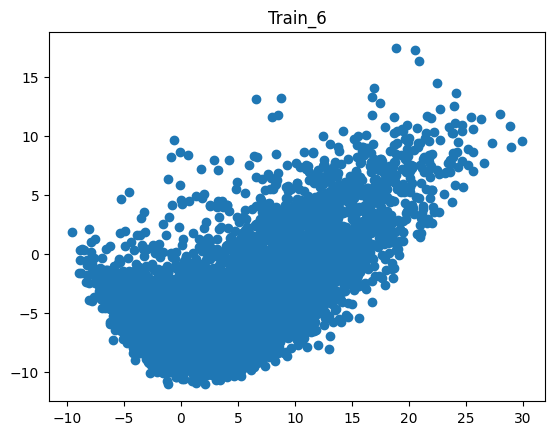

In [20]:
plt.scatter(train_6_reduced_dimension[:,0] ,train_6_reduced_dimension[:,1])
plt.title('Train_6')

Text(0.5, 1.0, 'Test_5')

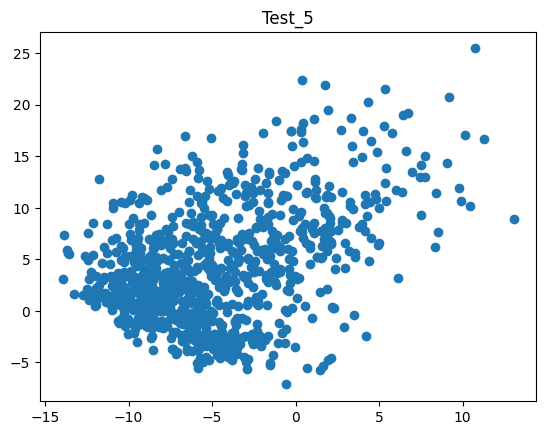

In [21]:
plt.scatter(test_5_reduced_dimension[:,0] ,test_5_reduced_dimension[:,1])
plt.title('Test_5')

Text(0.5, 1.0, 'Test_6')

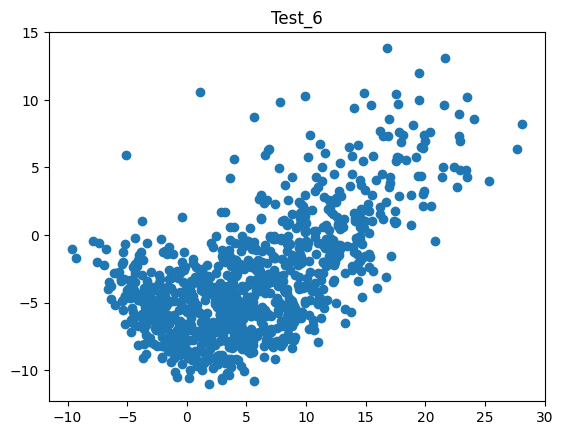

In [22]:
plt.scatter(test_6_reduced_dimension[:,0] ,test_6_reduced_dimension[:,1])
plt.title('Test_6')

Text(0.5, 1.0, 'Training Data')

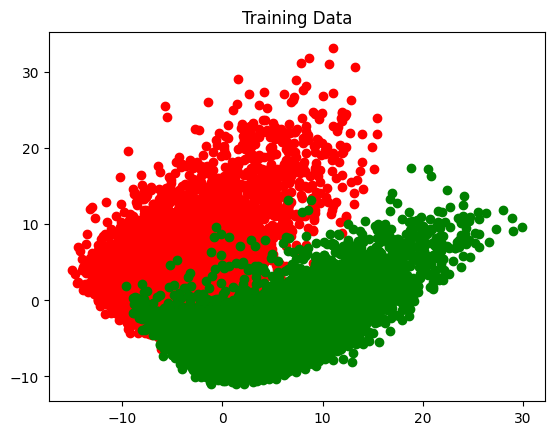

In [23]:
plt.scatter(train_5_reduced_dimension[:,0] ,train_5_reduced_dimension[:,1], color = 'red')
plt.scatter(train_6_reduced_dimension[:,0] ,train_6_reduced_dimension[:,1],color = 'green')
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

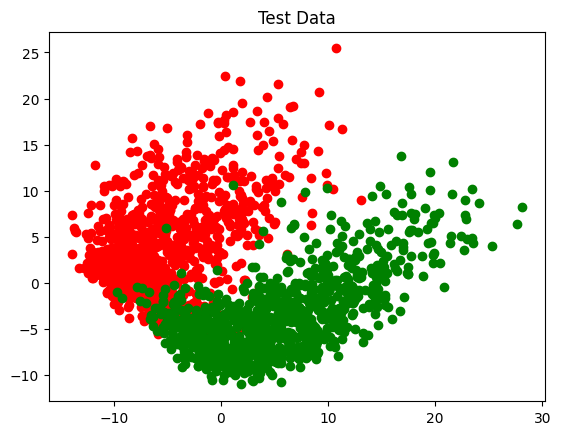

In [24]:
plt.scatter(test_5_reduced_dimension[:,0] ,test_5_reduced_dimension[:,1], color = 'red')
plt.scatter(test_6_reduced_dimension[:,0] ,test_6_reduced_dimension[:,1],color = 'green')
plt.title('Test Data')

# Task 4

In [25]:
mean_train_5 = train_5_reduced_dimension.mean(axis=0)
cov_train_5 = np.cov(train_5_reduced_dimension, rowvar=False)
print("mean of train 5: ", mean_train_5)
print("covariance matrix of train 5: ", cov_train_5)

mean of train 5:  [-4.45320748  4.06951377]
covariance matrix of train 5:  [[23.39792743 15.13683929]
 [15.13683929 36.44222332]]


In [26]:
mean_train_6 = train_6_reduced_dimension.mean(axis=0)
cov_train_6 = np.cov(train_6_reduced_dimension, rowvar=False)
print("mean of train 6: ", mean_train_6)
print("covariance matrix of train 6: ", cov_train_6)

mean of train 6:  [ 4.07922233 -3.72775171]
covariance matrix of train 6:  [[42.26796632 17.9467385 ]
 [17.9467385  18.33394357]]


In [27]:
params_5 = (mean_train_5, cov_train_5)
params_6 = (mean_train_6, cov_train_6)

# Task 5

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
def discri(data, params, prior=0.5):
    mean, cov = params

    sigma = np.linalg.inv(cov)
    det = np.linalg.det(cov)

    return -1*((np.dot(np.dot((data-mean).reshape(1,-1), sigma), (data-mean).reshape(-1,1))[0][0]) + (math.log(2 * np.pi) / 2) + (math.log(det) / 2) - math.log(prior))

def cla(x, parameter_5, parameter_6):
    if discri(x, parameter_5) > discri(x, parameter_6):
        return 5
    else:
        return 6

In [30]:
y_train_samples = [5]*train_5_reduced_dimension.shape[0] + [6]*train_6_reduced_dimension.shape[0]
y_test_samples = [5]*test_5_reduced_dimension.shape[0] + [6]*test_6_reduced_dimension.shape[0]

y_train_pred_samples = []
y_test_pred_samples = []

In [31]:
import math

In [32]:
for i in np.concatenate((train_5_reduced_dimension, train_6_reduced_dimension)):
    y_train_pred_samples.append(cla(i, params_5, params_6))

for j in np.concatenate((test_5_reduced_dimension, test_6_reduced_dimension)):
    y_test_pred_samples.append(cla(j, params_5, params_6))

print(f"Training Accuracy: {accuracy_score(y_train_samples, y_train_pred_samples)}")
print(f"Test Accuracy: {accuracy_score(y_test_samples, y_test_pred_samples)}")

Training Accuracy: 0.9436458241467501
Test Accuracy: 0.9394594594594594
